<a href="https://colab.research.google.com/github/Akintoyeai/Waste_classification_with_Transfer_Learning/blob/main/Waste_classification_with_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Computer Vision can be used alone or with  Robotics to pick and sort  waste.

In [ ]:
import tensorflow as tf

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download techsash/waste-classification-data

 99% 424M/427M [00:10<00:00, 53.4MB/s]
100% 427M/427M [00:10<00:00, 42.6MB/s]


In [ ]:
!unzip waste-classification-data.zip

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
training_dir = '/content/DATASET/TRAIN'
test_dir = '/content/DATASET/TEST'

In [ ]:
import os
# Directory with our training organic pictures
train_organic_dir = os.path.join('/content/DATASET/TRAIN/O')

# Directory with our training recycle pictures
train_recycle_dir = os.path.join('/content/DATASET/TRAIN/R')

In [ ]:
train_organic_names = os.listdir(train_organic_dir)
print(train_organic_names[:10])

train_recycle_names = os.listdir(train_recycle_dir)
print(train_recycle_names[:10])

['O_5578.jpg', 'O_11840.jpg', 'O_304.jpg', 'O_7542.jpg', 'O_930.jpg', 'O_2881.jpg', 'O_11450.jpg', 'O_9548.jpg', 'O_4324.jpg', 'O_1497.jpg']
['R_6855.jpg', 'R_5352.jpg', 'R_9783.jpg', 'R_8249.jpg', 'R_4429.jpg', 'R_2314.jpg', 'R_8938.jpg', 'R_8971.jpg', 'R_6921.jpg', 'R_5588.jpg']


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_organic_dir, fname) 
                for fname in train_organic_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_recycle_dir, fname) 
                for fname in train_recycle_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = (200,200),
    class_mode  = 'binary'
)

Found 22564 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1/255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (200,200),
    class_mode ='binary'
)

Found 2513 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras import Model

weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"

from urllib.request import urlretrieve

urlretrieve(weights_url, weights_file)
pre_trained_model = InceptionV3(input_shape=(200, 200, 3),
 include_top=False,
 weights=None)
pre_trained_model.load_weights(weights_file)

# pre_trained_model.summary()

for layer in pre_trained_model.layers:
 layer.trainable = False
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = Model(pre_trained_model.input, x)

model.summary()


In [ ]:
model.summary()

In [ ]:
model = Model(pre_trained_model.input, x)
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001),
 loss='binary_crossentropy',
 metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history = model.fit_generator(
 train_generator,
 steps_per_epoch=8,
 epochs=15,
 verbose=1,
 validation_data=test_generator
)


Epoch 1/15


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


8/8 [==============================] - 17s 2s/step - loss: 1.6319 - acc: 0.6094 - val_loss: 0.4365 - val_acc: 0.7975
Epoch 2/15
8/8 [==============================] - 11s 2s/step - loss: 0.3797 - acc: 0.8320 - val_loss: 0.2380 - val_acc: 0.9045
Epoch 3/15
8/8 [==============================] - 11s 1s/step - loss: 0.2623 - acc: 0.8945 - val_loss: 0.2801 - val_acc: 0.8938
Epoch 4/15
8/8 [==============================] - 11s 1s/step - loss: 0.3420 - acc: 0.8555 - val_loss: 0.2476 - val_acc: 0.9053
Epoch 5/15
8/8 [==============================] - 11s 1s/step - loss: 0.2522 - acc: 0.8984 - val_loss: 0.2557 - val_acc: 0.8898
Epoch 6/15
8/8 [==============================] - 11s 1s/step - loss: 0.2813 - acc: 0.8789 - val_loss: 0.2661 - val_acc: 0.9017
Epoch 7/15
8/8 [==============================] - 11s 1s/step - loss: 0.1993 - acc: 0.9375 - val_loss: 0.2378 - val_acc: 0.9049
Epoch 8/15
8/8 [==============================] - 11s 1s/step - loss: 0.3612 - acc: 0.8750 - val_loss: 0.2413 - val

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['acc'],
                         mode='lines+markers',
                         name='Training acc'))
fig.add_trace(go.Scatter(x=history.epoch,
                         y=history.history['val_acc'],
                         mode='lines+markers',
                         name='Validation accuracy'))
fig.update_layout(title='Accuracy',
                  xaxis=dict(title='Epoch'),
                  yaxis=dict(title='Percentage'))
fig.show()

In [ ]:
# Upload Image to test model
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is organic")
  else:
    print(fn + " is  inorganic")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



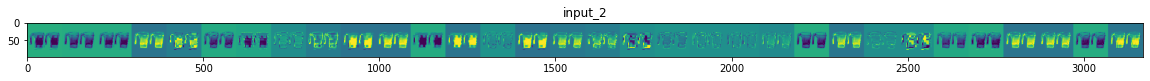

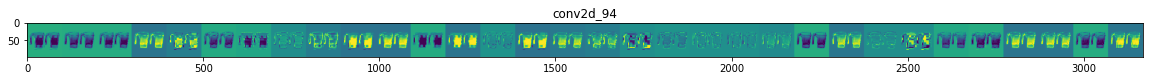

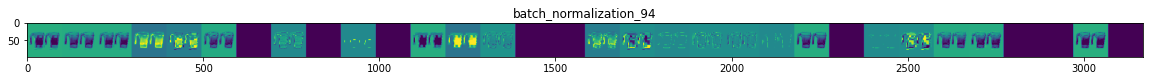

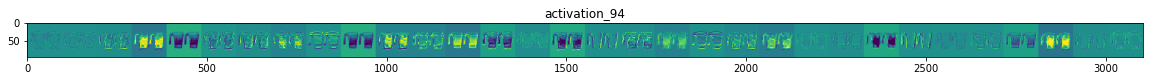

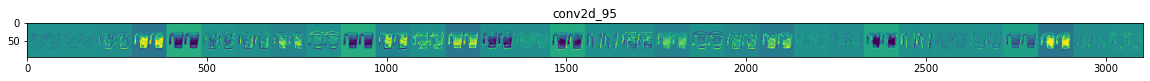

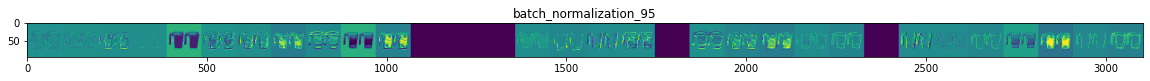

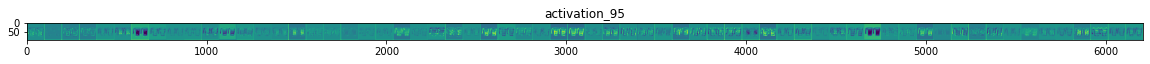

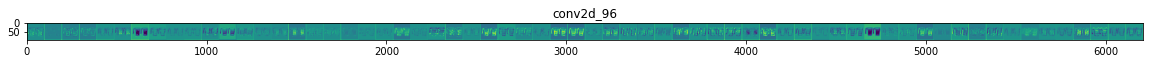

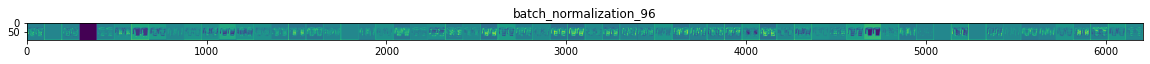

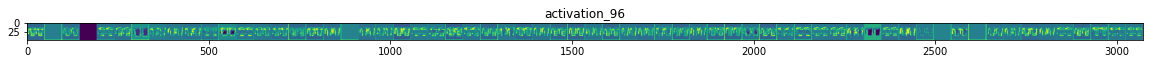

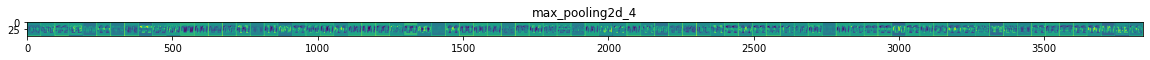

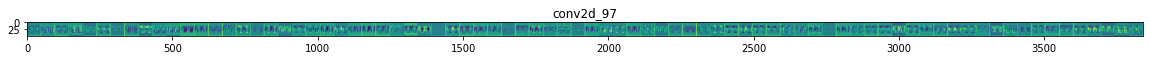

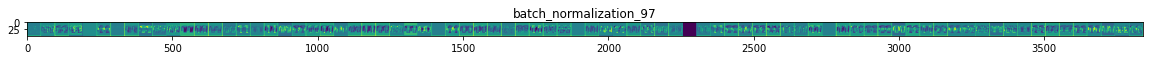

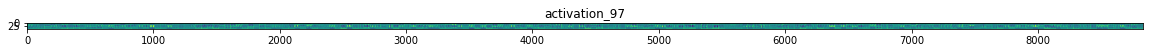

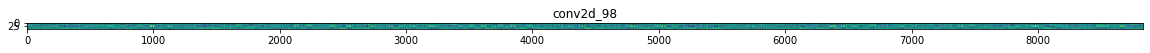

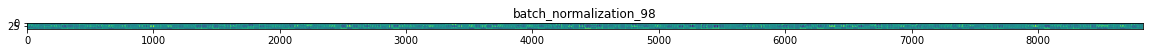

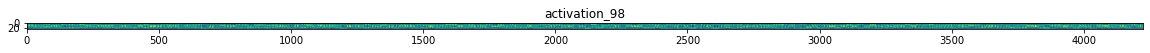

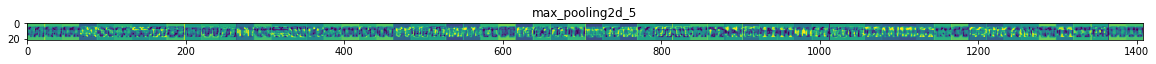

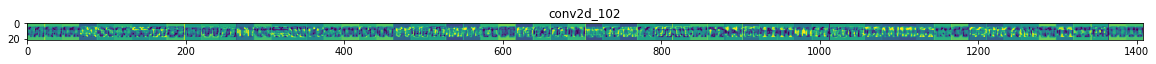

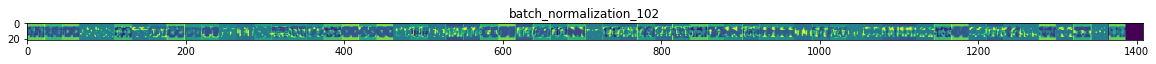

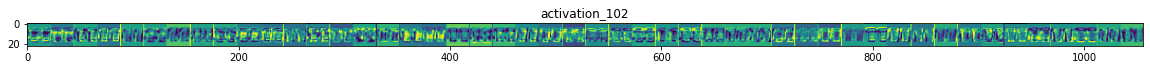

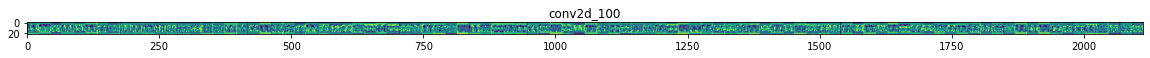

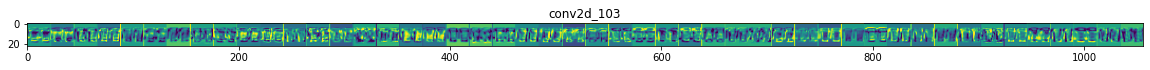

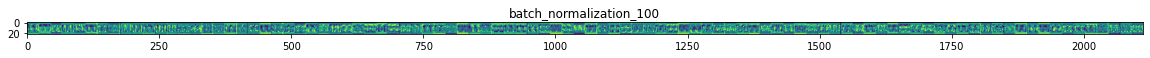

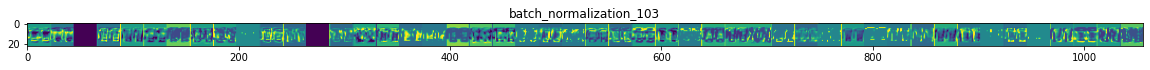

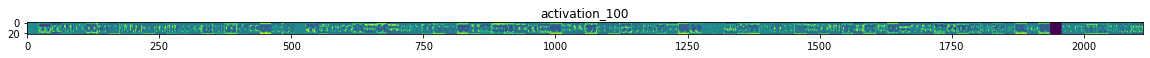

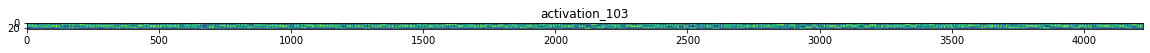

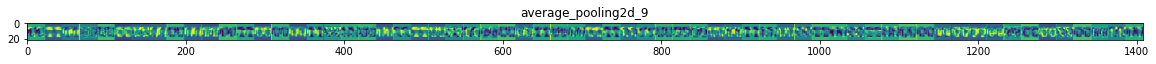

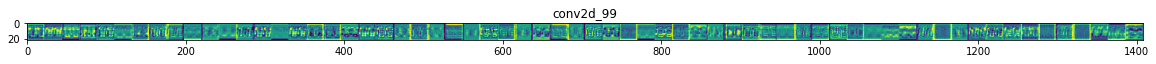

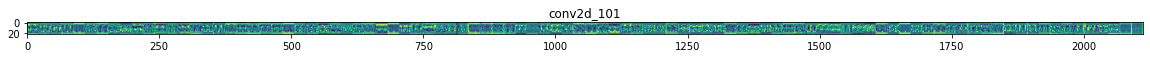

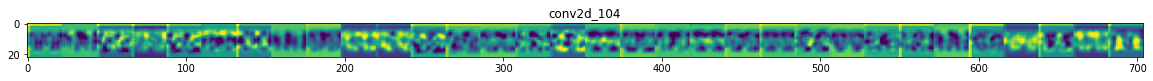

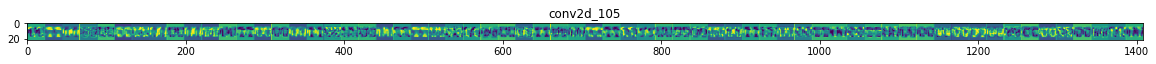

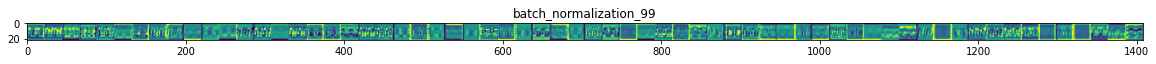

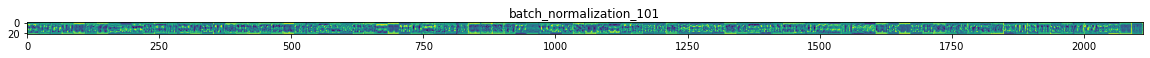

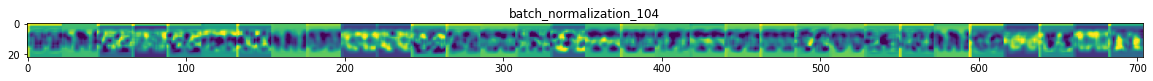

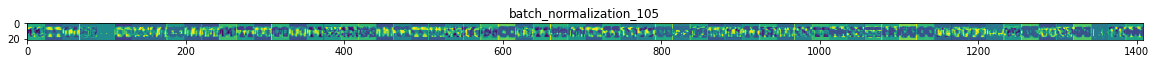

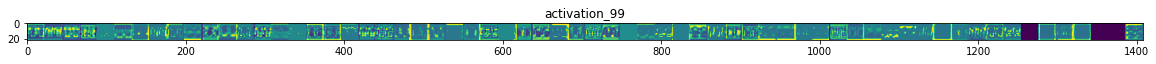

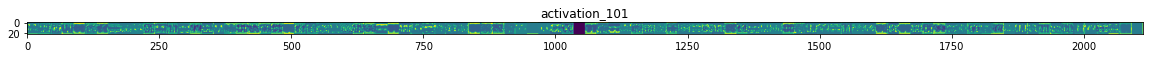

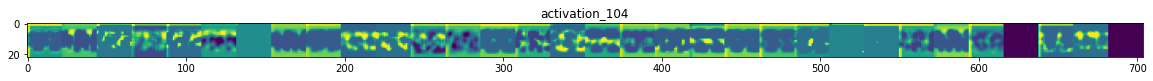

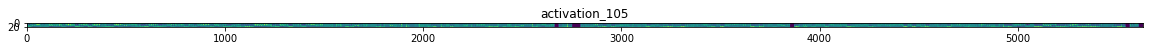

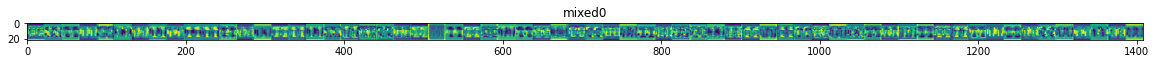

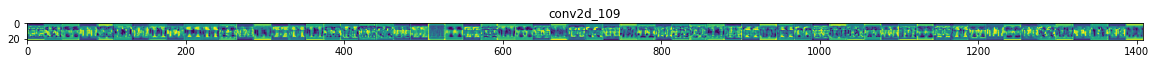

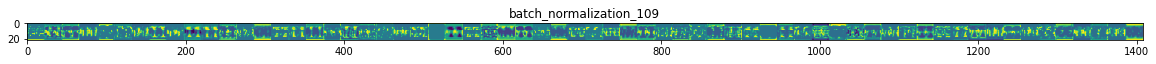

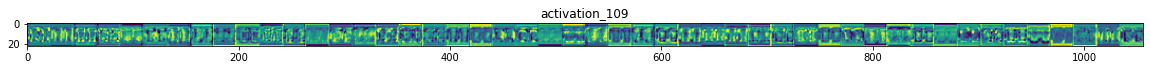

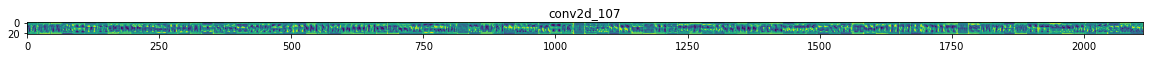

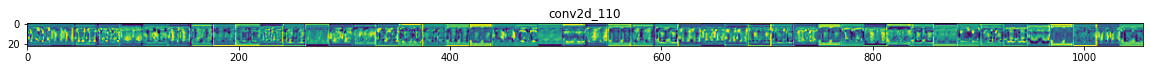

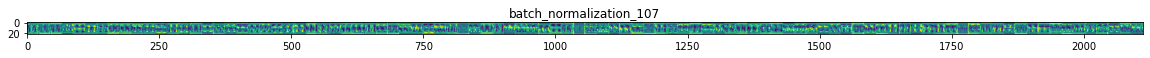

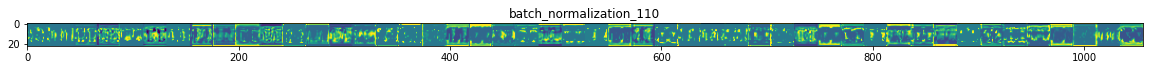

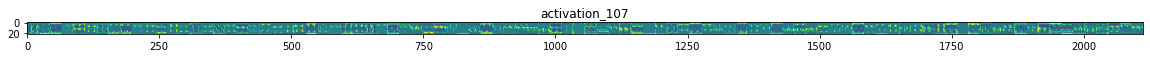

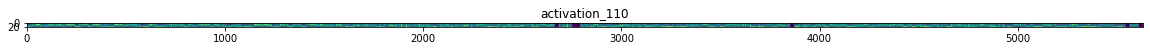

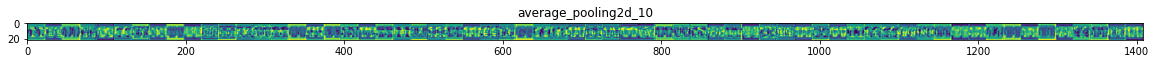

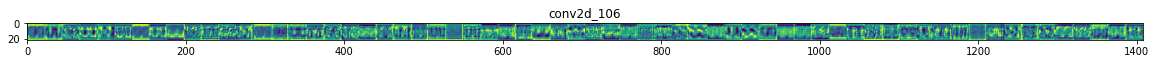

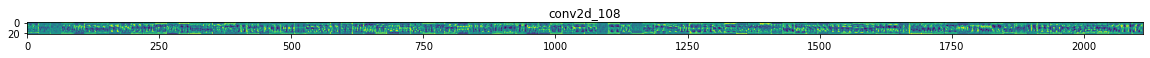

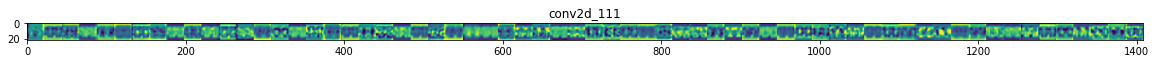

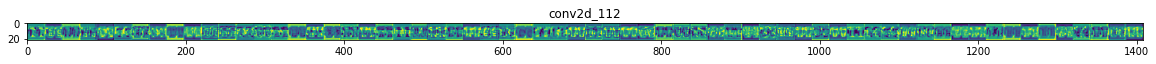

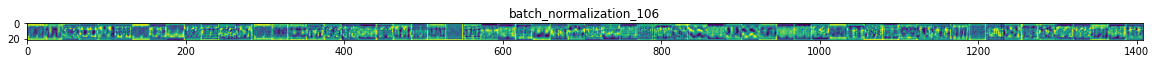

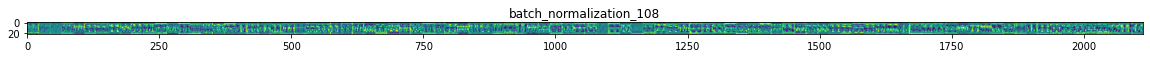

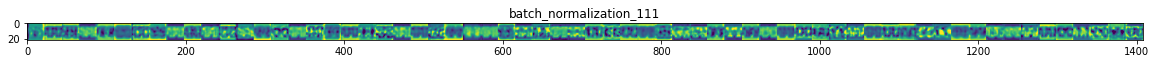

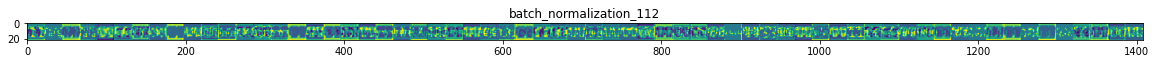

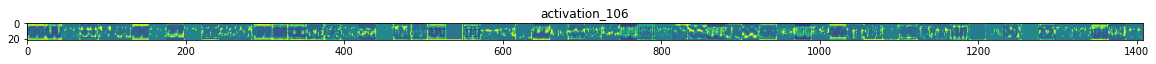

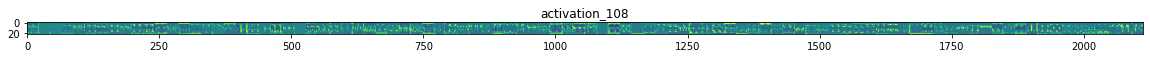

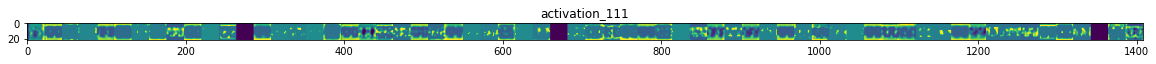

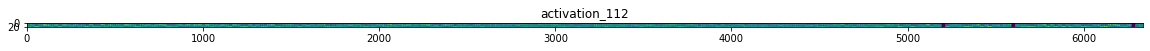

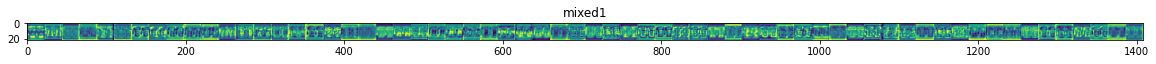

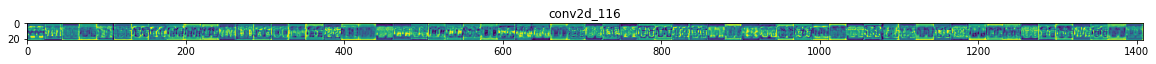

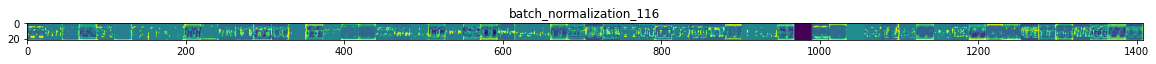

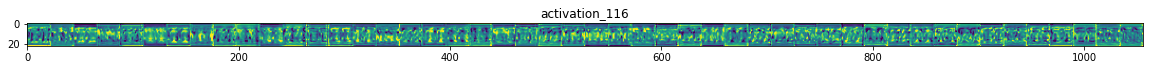

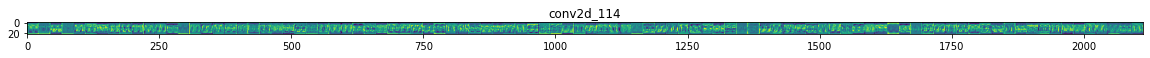

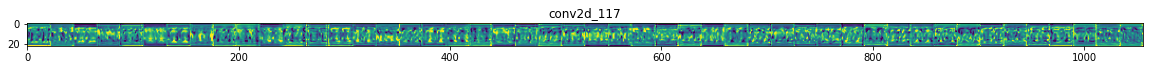

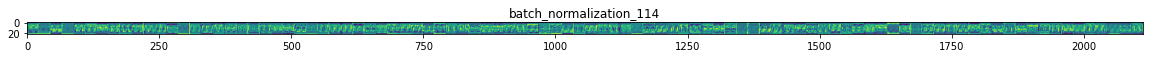

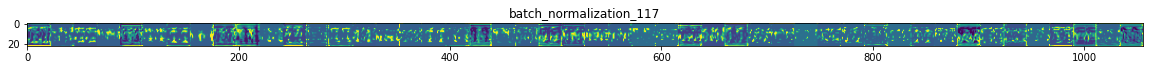

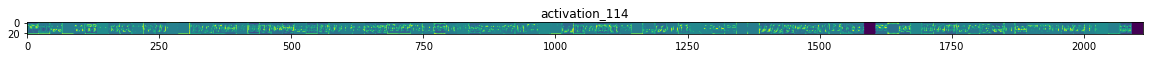

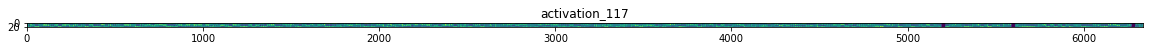

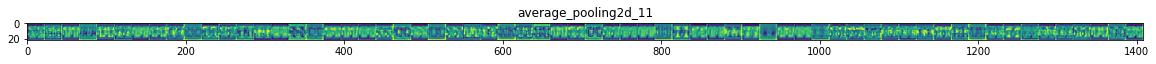

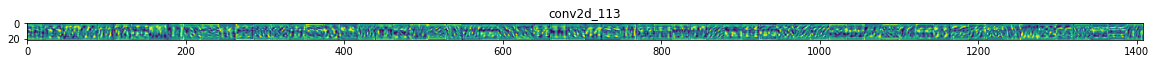

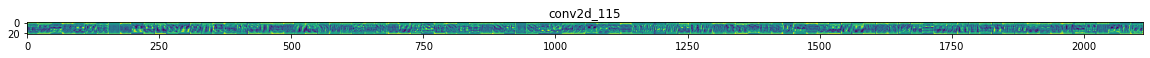

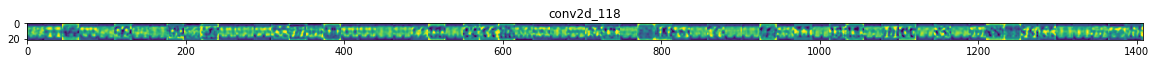

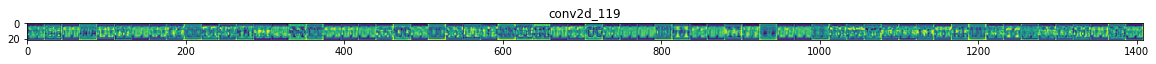

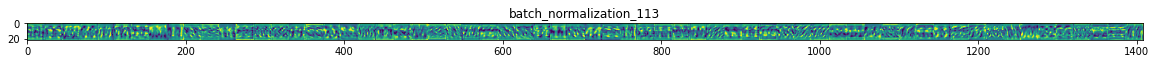

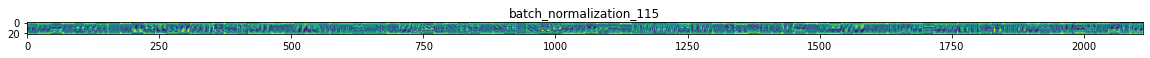

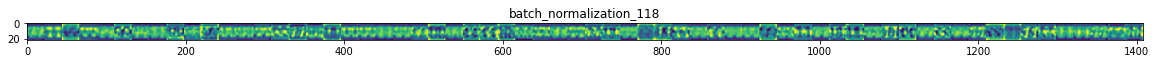

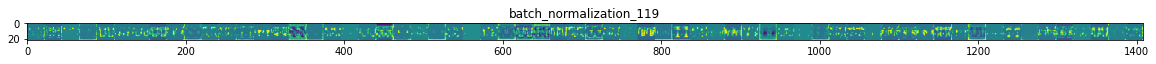

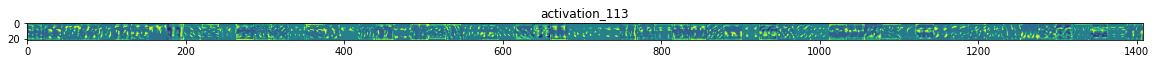

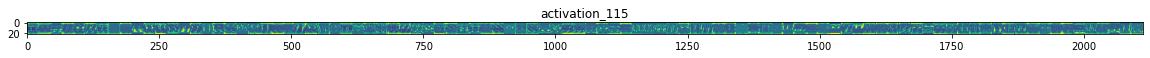

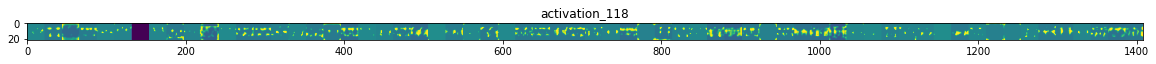

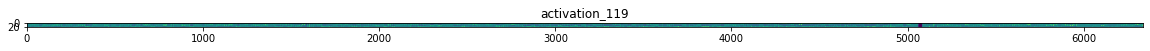

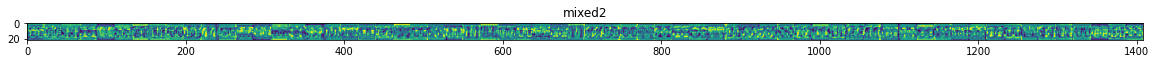

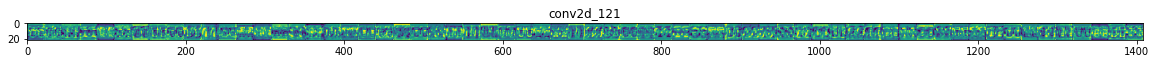

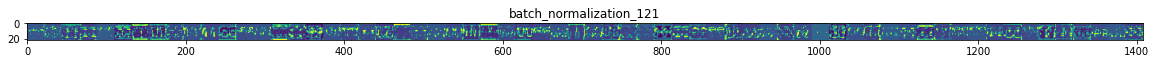

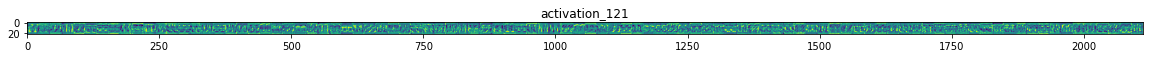

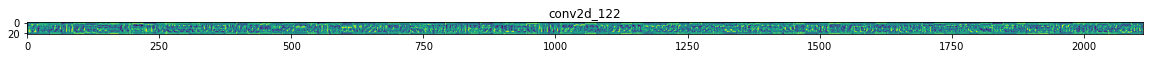

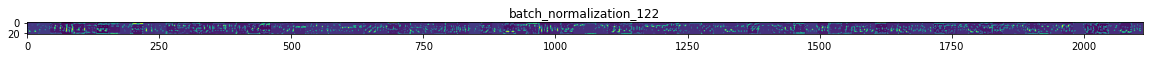

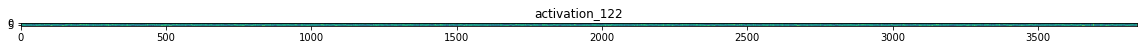

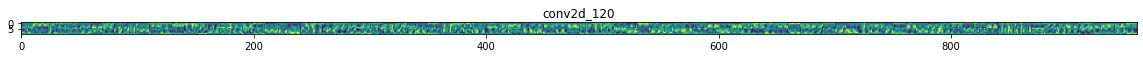

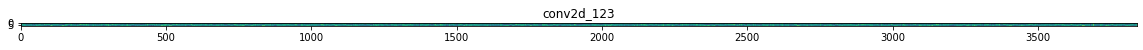

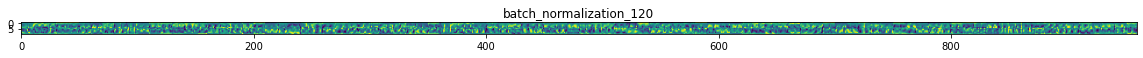

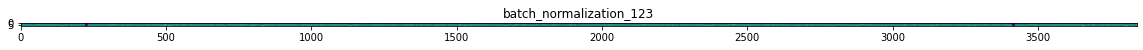

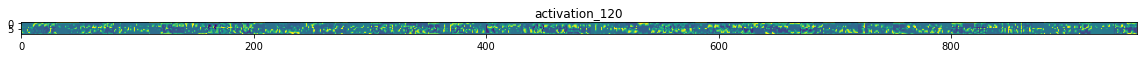

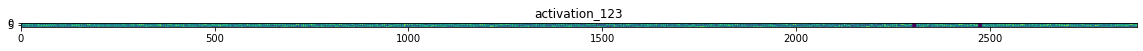

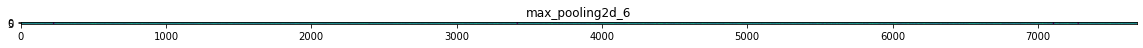

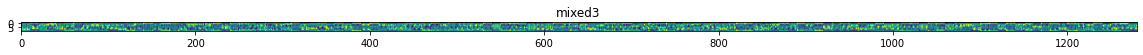

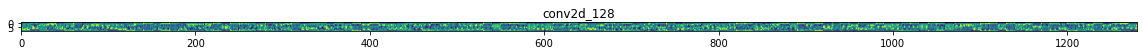

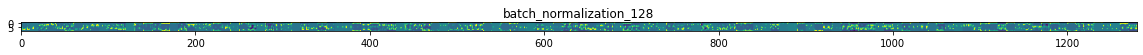

Error in callback <function flush_figures at 0x7fd487e243b0> (for post_execute):


KeyboardInterrupt: ignored

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_organic_dir, f) for f in train_organic_names]
human_img_files = [os.path.join(train_recycle_dir, f) for f in train_recycle_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(200, 200))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')